# BIKE Demand Prediction



### Build a multiple linear regression model for the prediction of demand for shared bikes
- A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario
- So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end

### The company wants to know:

- Which variables are significant in predicting the demand for shared bikes. 
- How well those variables describe the bike demands

### day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing machine learning libraries

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Displaying the 150 columns and rows

pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',50)

## Reading the dataset

In [5]:
# reading the CSV file using pandas 'read_csv' method and storing it in bikes dataframe
# also diplaying the first 5 rows 
data = pd.read_csv(r"C:\Users\hussa\Downloads\archive (4)\hour.csv")
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Inspecting the Dataframe
Checking the Dataframe dimension, null values,summary of the dataframe  

In [6]:
# Checking the number of rows and columns in the dataframe using ".shape" attribute

data.shape

(17379, 17)

In [7]:
# Checking the column-wise info of the dataframe using ".info()" method

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
# Checking the summary for the numeric columns 

data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


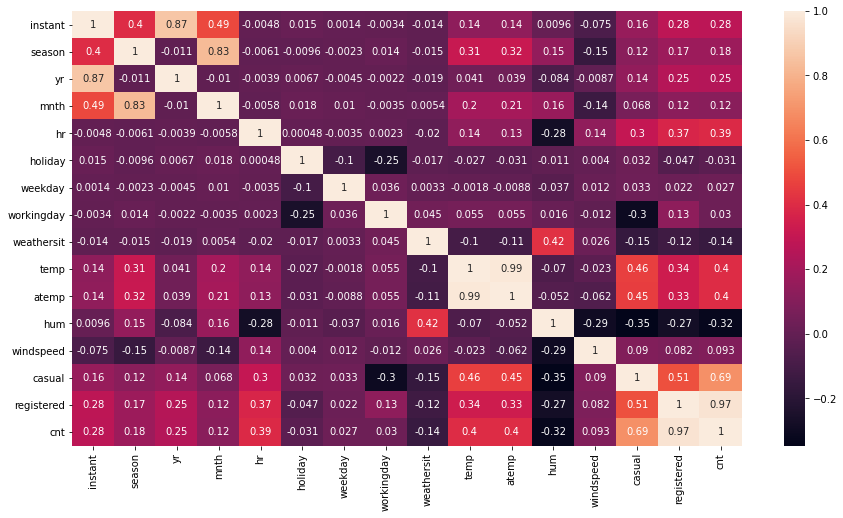

In [9]:
# plotting the heatmap(sns.heatmap()) to to check the correlation(.corr()) between the above columns and the target variable 

plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

### Dropping the following columns
- dteday 
- instant which nothing but the id number for each record
- atemp which represents the temperature itself and it is 0.99% correlated with temp
- casual and registers these are 

In [10]:
bikes = data.drop(['dteday','instant','atemp','casual','registered'],axis=1)
bikes.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1


# Converting the numeric features to categorical as per the data dictionary
- season - spring, summer, fall and winter
- mnth - january to december
- weekday - sunday to saturday
- weathersit - clear,mist,light snow and heavy rain

In [11]:
# converting the categorical features to different sub-categorical levels 

bikes['season'] = bikes['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

bikes['mnth'] = bikes['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',
                                                      10:'oct',11:'nov',12:'dec'})

bikes['weekday'] = bikes['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thur',5:'fri',6:'sat'})

bikes['weathersit'] = bikes['weathersit'].map({1:'clear',2:'mist',3:'light snow',4:'heavy rain'})

In [12]:
# checking the head of the dataframe after conversion

bikes.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,0,sat,0,clear,0.24,0.81,0.0,16
1,spring,0,jan,1,0,sat,0,clear,0.22,0.80,0.0,40
2,spring,0,jan,2,0,sat,0,clear,0.22,0.80,0.0,32
3,spring,0,jan,3,0,sat,0,clear,0.24,0.75,0.0,13
4,spring,0,jan,4,0,sat,0,clear,0.24,0.75,0.0,1


# Data Visualization
- The function is created to plot. 
 1. the box plot between the categorical feature and Target variable
 2. Barplot for each categorical feature sum i.e total number and percentage of cnt for each categorical levels

In [13]:
# function to plot box plt and bar plot for each categorical feature

def predictor_info(predictor,x_title):
    
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.boxplot(x=predictor,y='cnt',data=bikes)
    plt.xlabel(x_title,fontdict={'fontsize':15,'color':'green'})
    plt.ylabel('Total Count',fontdict={'fontsize':15,'color':'green'})
    plt.title(x_title+' - '+'Total Counts\n',fontdict={'fontsize':20,'color':'brown'})
    
    plt.subplot(1,2,2)    
    grouped = bikes.groupby(predictor).sum()['cnt']
    axe = sns.barplot(grouped.index,grouped)
    plt.xlabel(x_title,fontdict={'fontsize':15,'color':'green'})
    plt.ylabel('')
    #plt.ylabel('Total Count',fontdict={'fontsize':15,'color':'green'})
    plt.title(x_title + ' - ' +'Total Count % \n',fontdict={'fontsize':20,'color':'brown'})
    
    for p in axe.patches:
        axe.annotate('{:.1f}%'.format((p.get_height()/bikes['cnt'].sum())*100), (p.get_x()+0.1,(p.get_height())))
        
    plt.tight_layout()
    plt.show()

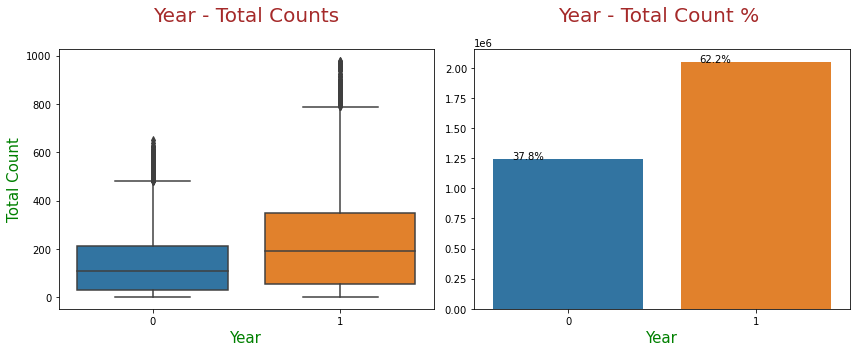

In [14]:
# plotting the users count over the years using predictor_info() function.

predictor_info('yr','Year')

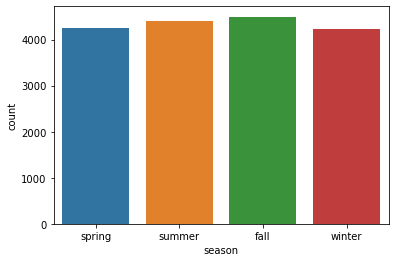

In [15]:
sns.countplot(x='season',data=bikes)
plt.show()

In [16]:
bikes['cnt'].sum()

3292679

In [17]:
bikes.groupby('season').sum()

,yr,hr,holiday,workingday,temp,hum,windspeed,cnt
season,,,,,,,,
fall,2256,51738,96,3141,3176.02,2846.72,771.4810,1061129
spring,2174,49413,164,2794,1268.98,2466.08,912.4850,471348
summer,2206,50757,96,3066,2401.42,2764.54,896.8359,918589
winter,2098,48763,144,2864,1790.72,2823.27,722.9044,841613


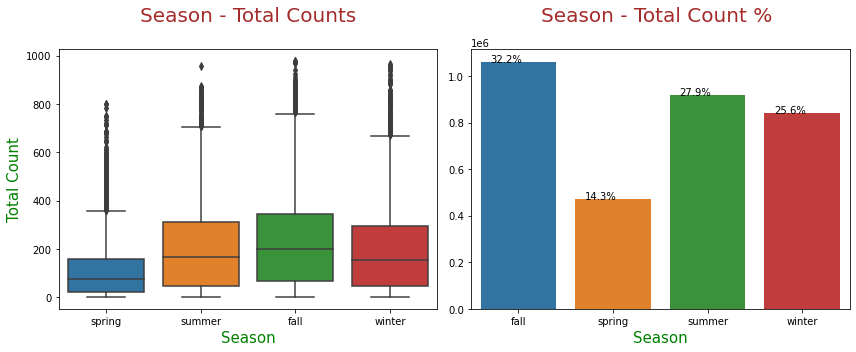

In [18]:
# plotting the users count for every season using predictor_info() function.

predictor_info('season','Season')

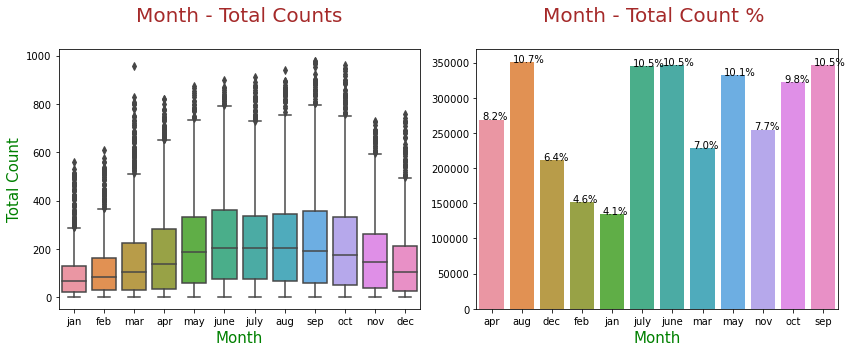

In [19]:
# plotting the users count over every month using predictor_info() function.

predictor_info('mnth','Month')

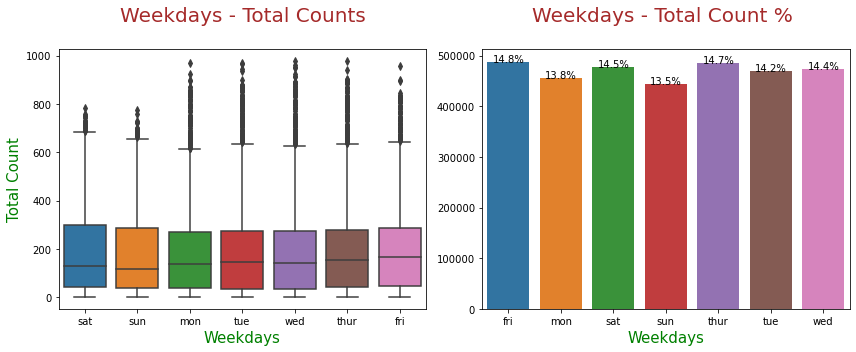

In [20]:
# plotting the users count for weekdays using predictor_info() function.

predictor_info('weekday','Weekdays')

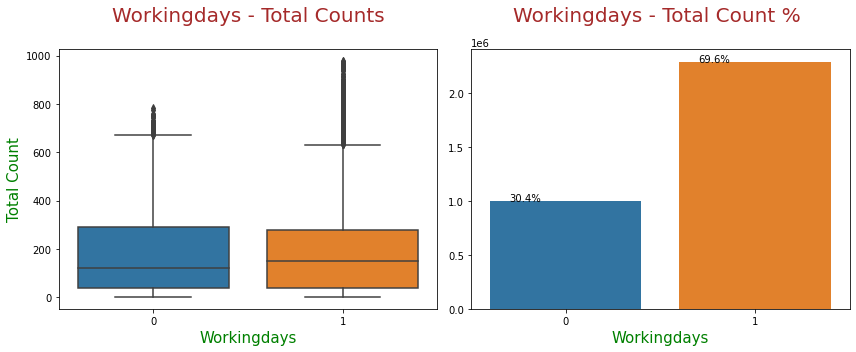

In [21]:
# plotting the users count for working and holodays using predictor_info() function.

predictor_info('workingday','Workingdays')

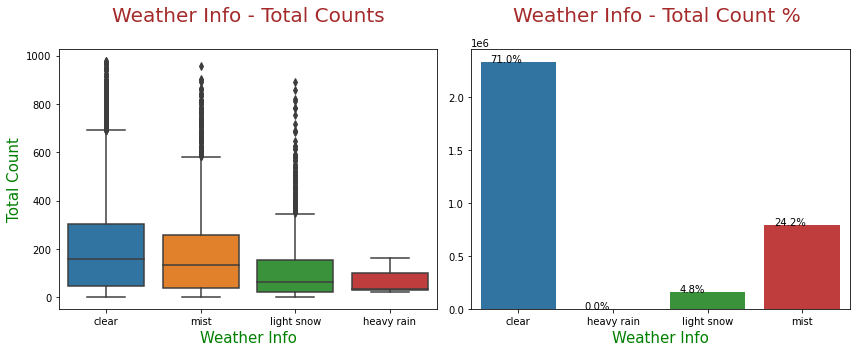

In [22]:
# plotting the users count for different weather conditions using predictor_info() function.

predictor_info('weathersit','Weather Info')

In [23]:
bikes[bikes['mnth']=='sep'].head(30)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
5725,fall,0,sep,0,0,thur,1,clear,0.60,0.78,0.1045,51
5726,fall,0,sep,1,0,thur,1,clear,0.60,0.73,0.0896,21
5727,fall,0,sep,2,0,thur,1,clear,0.58,0.78,0.0896,25
5728,fall,0,sep,3,0,thur,1,clear,0.58,0.78,0.0896,14
5729,fall,0,sep,4,0,thur,1,clear,0.56,0.83,0.0896,7
5730,fall,0,sep,5,0,thur,1,clear,0.56,0.73,0.0896,23
5731,fall,0,sep,6,0,thur,1,clear,0.60,0.78,0.0000,105
5732,fall,0,sep,7,0,thur,1,clear,0.60,0.78,0.0000,342
5733,fall,0,sep,8,0,thur,1,clear,0.62,0.73,0.1343,498
5734,fall,0,sep,9,0,thur,1,clear,0.64,0.69,0.1045,207


In [24]:
bikes.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,0,sat,0,clear,0.24,0.81,0.0,16
1,spring,0,jan,1,0,sat,0,clear,0.22,0.80,0.0,40
2,spring,0,jan,2,0,sat,0,clear,0.22,0.80,0.0,32
3,spring,0,jan,3,0,sat,0,clear,0.24,0.75,0.0,13
4,spring,0,jan,4,0,sat,0,clear,0.24,0.75,0.0,1


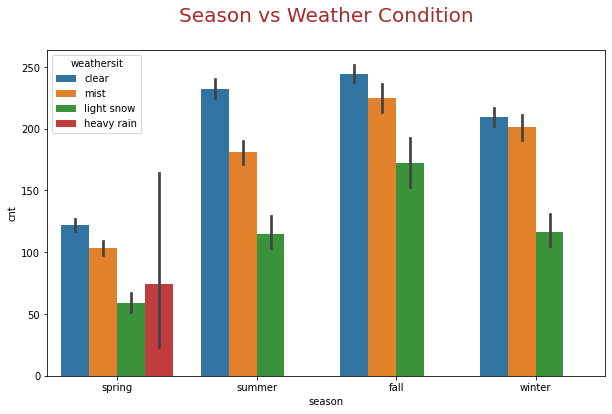

In [25]:
# plotting the barplot for 'season', 'cnt' and 'weathersit' 

plt.figure(figsize=(10,6))
sns.barplot(x='season',y='cnt',data=bikes,hue='weathersit')
plt.title('Season vs Weather Condition\n',fontdict={'color':'brown','fontsize':20})
plt.show()

# Convering to Dummies
- converting the column 'season', 'mnth' , 'weekday' and 'weathersit' to dummies and droping first coloum

In [26]:
# converting into dummies 

to_dumies = ['season','mnth','weekday','weathersit']

for i in to_dumies:
    dummie_vars = pd.get_dummies(bikes[i],drop_first=True)
    bikes = pd.concat([bikes,dummie_vars],axis=1)
    
bikes.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thur,tue,wed,heavy rain,light snow,mist
0,spring,0,jan,0,0,sat,0,clear,0.24,0.81,0.0,16,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,spring,0,jan,1,0,sat,0,clear,0.22,0.80,0.0,40,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,spring,0,jan,2,0,sat,0,clear,0.22,0.80,0.0,32,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,3,0,sat,0,clear,0.24,0.75,0.0,13,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,spring,0,jan,4,0,sat,0,clear,0.24,0.75,0.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [27]:
bikes['weathersit'].value_counts()

clear         11413
mist           4544
light snow     1419
heavy rain        3
Name: weathersit, dtype: int64

In [28]:
bikes.groupby('weathersit').sum()

,yr,hr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thur,tue,wed,heavy rain,light snow,mist
weathersit,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
clear,5768,133894,341,7632,5832.66,6548.17,2174.7828,2338173,2665.0,2859.0,2609.0,1086.0,828.0,862.0,890.0,1172.0,1093.0,903.0,944.0,958.0,875.0,879.0,1582.0,1675.0,1765.0,1656.0,1522.0,1568.0,0.0,0.0,0.0
heavy rain,2,35,0,2,0.56,2.65,0.6120,223,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0
light snow,638,16943,22,1040,648.04,1174.41,310.5122,158331,369.0,406.0,375.0,87.0,130.0,137.0,108.0,62.0,72.0,129.0,143.0,101.0,164.0,144.0,170.0,188.0,169.0,179.0,237.0,293.0,0.0,1419.0,0.0
mist,2326,49799,137,3191,2155.88,3175.38,817.7993,795952,1205.0,1144.0,1248.0,302.0,525.0,342.0,428.0,254.0,275.0,441.0,401.0,378.0,412.0,414.0,726.0,648.0,568.0,636.0,694.0,613.0,0.0,0.0,4544.0


In [29]:
# dropping the intial columns

bikes.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)
bikes.head()

,yr,hr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thur,tue,wed,heavy rain,light snow,mist
0,0,0,0,0,0.24,0.81,0.0,16,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0.22,0.80,0.0,40,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,2,0,0,0.22,0.80,0.0,32,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,3,0,0,0.24,0.75,0.0,13,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,4,0,0,0.24,0.75,0.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Correlation 
- The variables temp, yr, june,sep... are possitively correlated with cnt
- The variables spring, jan, feb, light snow and windspeed are negatively correlated with cnt

In [30]:
# checking the correlation of the predictors with target(cnt) variable
 
bikes.corr()['cnt'].sort_values(ascending=False)

cnt           1.000000
temp          0.404772
hr            0.394071
yr            0.250495
windspeed     0.093234
sep           0.084931
june          0.084600
aug           0.081657
july          0.071459
summer        0.060692
may           0.056422
oct           0.054406
workingday    0.030284
winter        0.029421
thur          0.015653
tue           0.003969
wed           0.003746
sat           0.001692
heavy rain   -0.008340
mon          -0.012860
nov          -0.020074
sun          -0.027118
holiday      -0.030927
mist         -0.046902
mar          -0.057131
dec          -0.079415
feb          -0.122113
light snow   -0.128034
jan          -0.156834
spring       -0.245456
hum          -0.322911
Name: cnt, dtype: float64

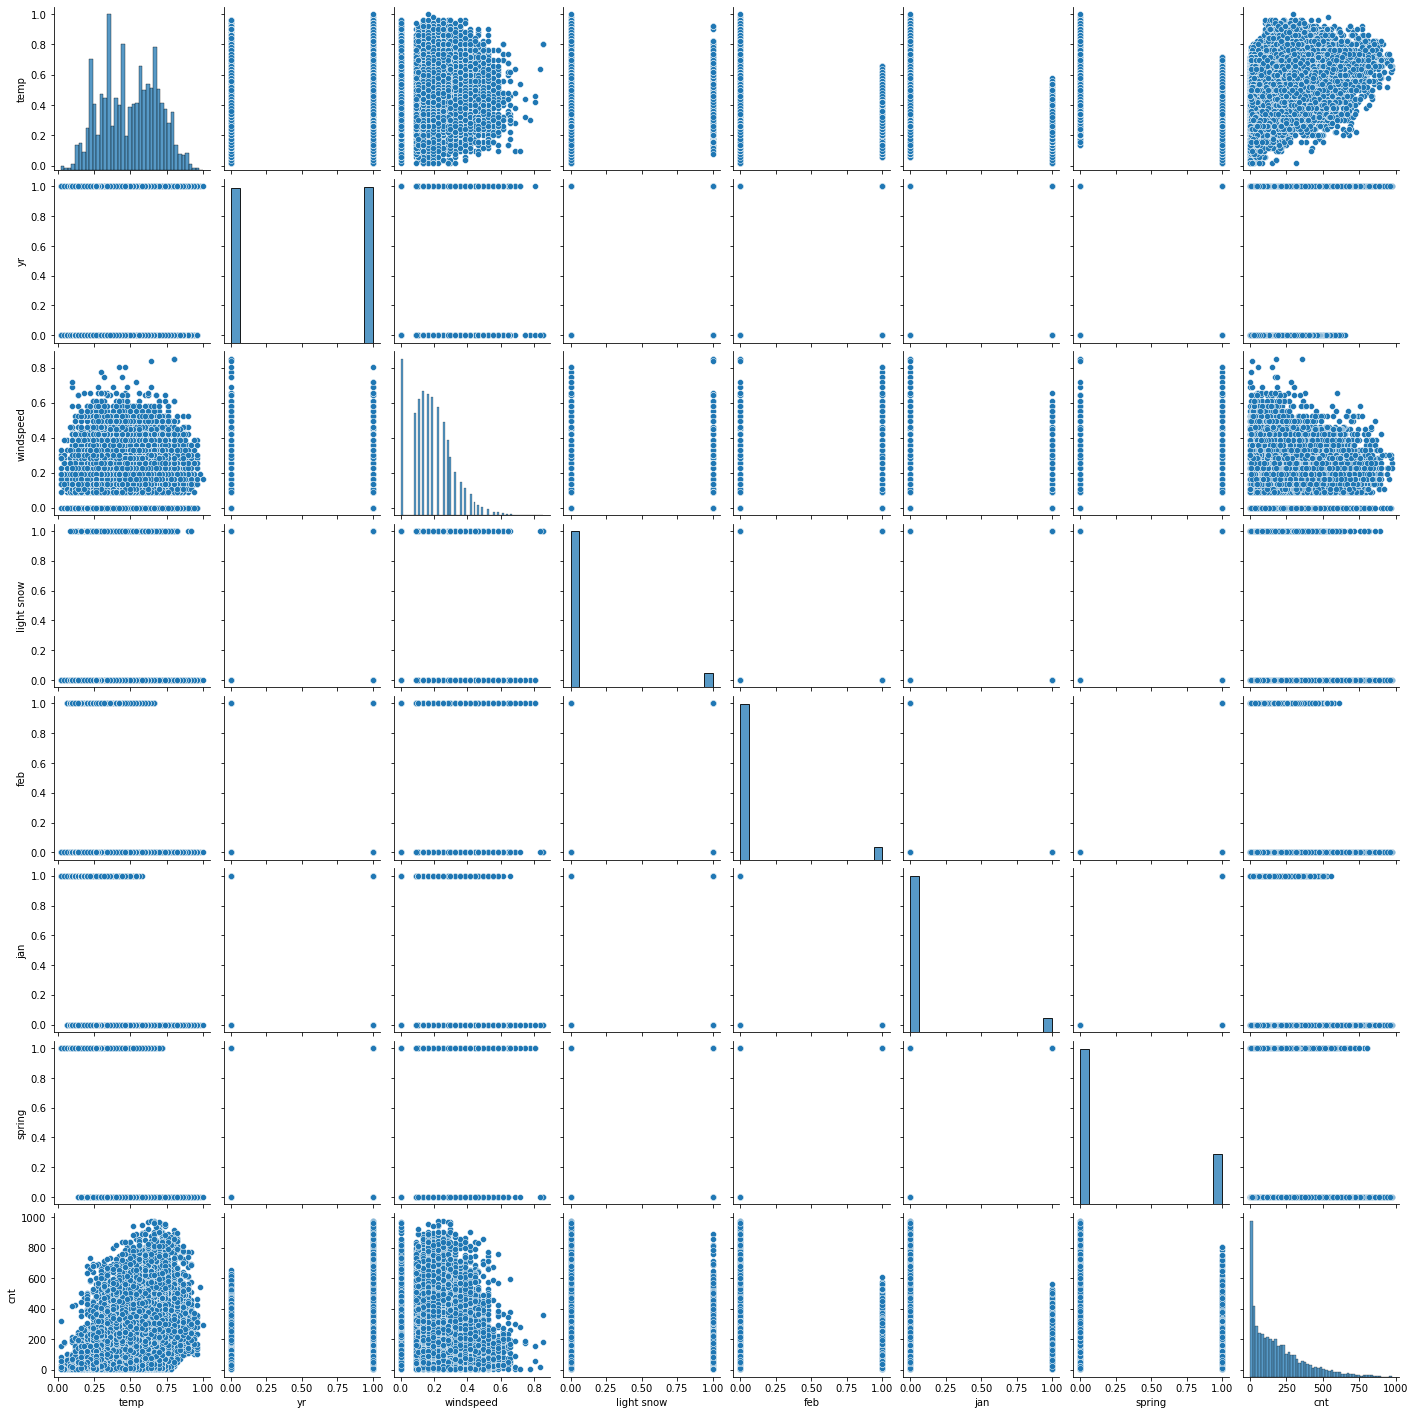

In [31]:
# plotting the scatter plot only for the predictors which are having good correlation with 'cnt'

sns.pairplot(bikes[['temp','yr','windspeed','light snow','feb','jan','spring','cnt']])
plt.show()

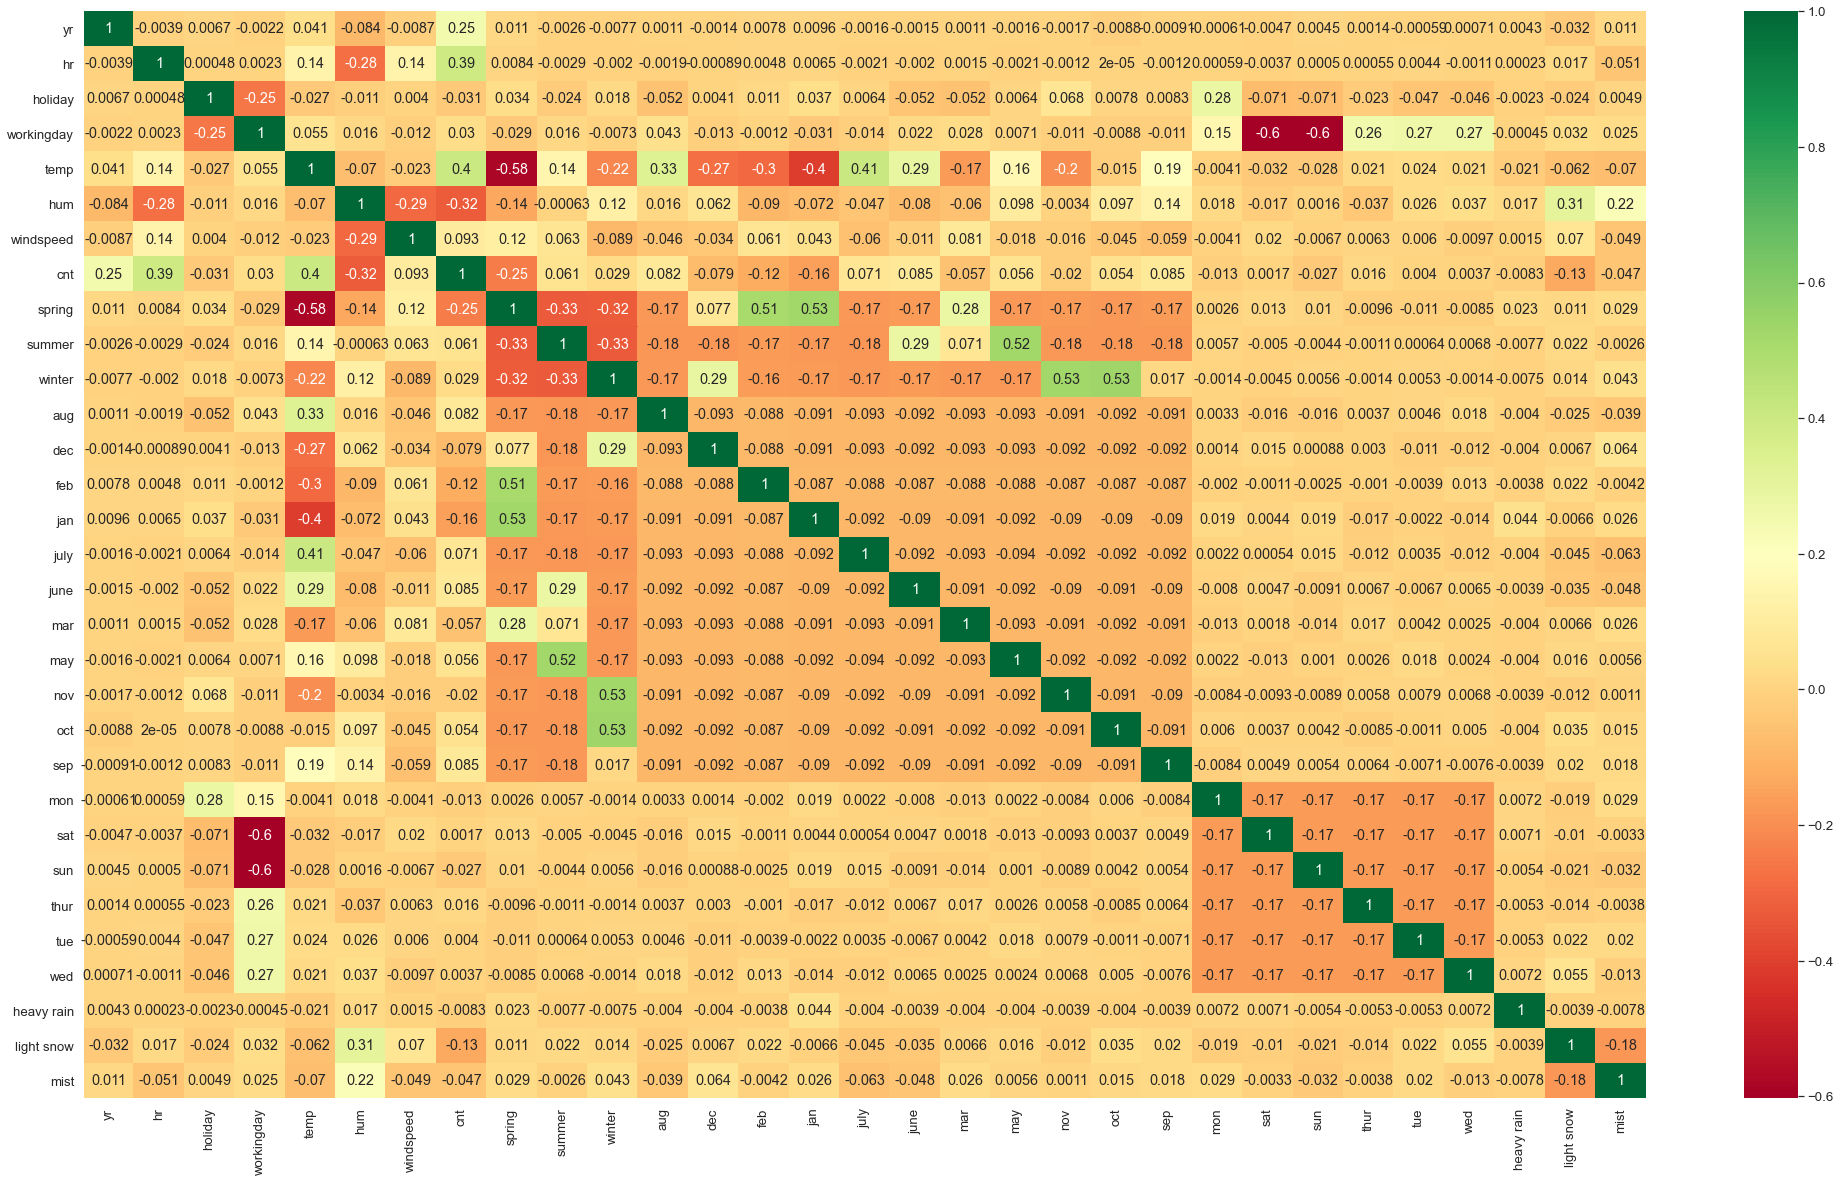

In [32]:
# pltting the heatmap for correlation matrix for the dataframe

plt.figure(figsize=(35,20))
sns.set(font_scale=1.2)
sns.heatmap(bikes.corr(),annot=True,cmap='RdYlGn')
plt.show()

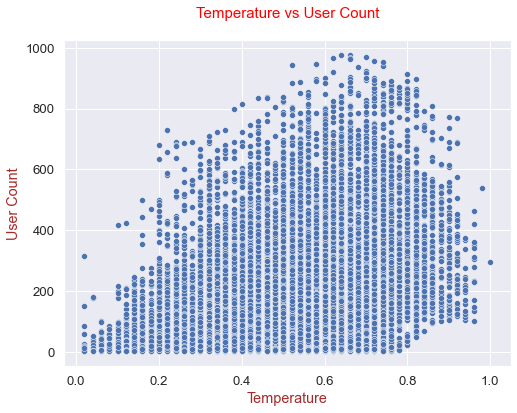

In [33]:
# ploting the scatter plot between 'cnt' and 'temp'

plt.figure(figsize=(8,6))
sns.scatterplot(x='temp',y='cnt',data=bikes)
plt.xlabel('Temperature',fontdict={'color':'brown'})
plt.ylabel('User Count',fontdict={'color':'brown'})
plt.title('Temperature vs User Count\n',fontdict={'fontsize':15, 'color':'red'})
plt.show()

# Splitting the data
- we will split the entire data into training dataset and testing dataset.
- we will fit the model on the training dataset and check the accuray of the model on test dataset.

In [34]:
# splitting the data into train and test with train_size = 0.75 and test_size = 0.25

df_train, df_test = train_test_split(bikes,test_size=0.25,random_state=100)

In [35]:
# cheking the shape of the split

print(df_train.shape)
print(df_test.shape)

(13034, 31)
(4345, 31)


In [36]:
# checking the head of the dataset

df_train.head()

,yr,hr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thur,tue,wed,heavy rain,light snow,mist
9734,1,13,0,1,0.40,0.43,0.2836,170,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
11694,1,11,0,1,0.54,0.73,0.1940,213,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2144,0,5,0,1,0.40,0.62,0.2537,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
11214,1,11,0,1,0.60,0.33,0.4179,239,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4527,0,13,0,1,0.86,0.47,0.2239,136,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


# Feature Scaling.
- feature scaling will be prefered most of the times for its quick results and interpretability of the variables.
- scaling will done when the scale between two features are high.
- The scaling will be done with MinMaxScale() which fits all the values in between 0 - 1.

In [37]:
# storing column names 'temp','hum','windspeed' and 'cnt' list.

var = ['temp','hum','windspeed','cnt']

In [38]:
# creating the scaler object.

scaler = MinMaxScaler()

In [39]:
# sacling selected column with fit_transform() method

df_train[var] = scaler.fit_transform(df_train[var])
df_train.describe()

,yr,hr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thur,tue,wed,heavy rain,light snow,mist
count,13034.000000,13034.000000,13034.000000,13034.000000,13034.000000,13034.000000,13034.000000,13034.000000,13034.000000,13034.000000,13034.000000,13034.000000,13034.000000,13034.000000,13034.000000,13034.000000,13034.000000,13034.000000,13034.000000,13034.000000,13034.000000,13034.000000,13034.000000,13034.000000,13034.000000,13034.000000,13034.000000,13034.000000,13034.00000,13034.000000,13034.000000
mean,0.502915,11.562068,0.028464,0.681142,0.498996,0.627062,0.222845,0.194411,0.240908,0.253184,0.244821,0.085929,0.084011,0.076416,0.078717,0.087464,0.083397,0.086159,0.085085,0.084778,0.083858,0.082323,0.145849,0.145773,0.144622,0.138637,0.141169,0.142474,0.00023,0.080865,0.264539
std,0.500011,6.888410,0.166301,0.466052,0.200750,0.193054,0.143065,0.185910,0.427651,0.434852,0.429998,0.280270,0.277415,0.265672,0.269307,0.282524,0.276492,0.280610,0.279019,0.278562,0.277185,0.274867,0.352969,0.352892,0.351733,0.345581,0.348209,0.349549,0.01517,0.272639,0.441104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,6.000000,0.000000,0.000000,0.333333,0.480000,0.122840,0.040984,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,12.000000,0.000000,1.000000,0.500000,0.630000,0.228047,0.146516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,18.000000,0.000000,1.000000,0.666667,0.780000,0.298225,0.288934,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
max,1.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Model Building.
- we will choose the linear regression model as the target varible is continous and there is some collinearity exist between the predictors and Target variable

In [40]:
# spling the data into target variable and predictors.

Y_train = df_train.pop('cnt')
X_train = df_train

## Model 1 : with all the features
considering all the feature and determing the significance of the predictors and the model

In [41]:
# adding const to the dataset for fitting the model with statsmodels library.
# fitting the model with OLS method.

X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(Y_train, X_train_lm).fit()
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     306.0
Date:                Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:10:16   Log-Likelihood:                 6825.7
No. Observations:               13034   AIC:                        -1.359e+04
Df Residuals:                   13004   BIC:                        -1.337e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0275      0.011     -2.534      0.011      -0.049      -0.006
yr             0.0807      0.003     31.764      0.000       0.076       0.086
hr             0.0075      0.000     37.984      0.000       0.007       0.008
holiday       -0.0317      0.007     -4.398      0.000      -0.046      -0.018
workingday     0.0033      0.004      0.877      0.380      -0.004       0.011
temp           0.3963      0.014     29.217      0.000       0.370       0.423
hum           -0.2023      0.008    -24.314      0.000      -0.219      -0.186
windspeed      0.0181      0.010      1.906      0.057      -0.001       0.037
spring        -0.0268      0.009     -2.871      0.004      -0.045      -0.009
summer         0.0221      0.008      2.729      0.006       0.006       0.038
winter         0.0356      0.008      4.236      0.000       0.019       0.052
aug           -0.0151      0.010     -1.439      0.150      -0.036       0.005
dec            0.0344      0.010      3.321      0.001       0.014       0.055
feb            0.0380      0.010      3.660      0.000       0.018       0.058
jan            0.0464      0.011      4.392      0.000       0.026       0.067
july          -0.0467      0.011     -4.397      0.000      -0.068      -0.026
june          -0.0277      0.007     -3.791      0.000      -0.042      -0.013
mar            0.0318      0.008      3.954      0.000       0.016       0.048
may            0.0035      0.007      0.531      0.596      -0.009       0.016
nov            0.0284      0.011      2.506      0.012       0.006       0.051
oct            0.0376      0.011      3.354      0.001       0.016       0.060
sep            0.0366      0.010      3.678      0.000       0.017       0.056
mon           -0.0049      0.005     -1.025      0.305      -0.014       0.004
sat            0.0075      0.004      1.761      0.078      -0.001       0.016
sun           -0.0066      0.004     -1.538      0.124      -0.015       0.002
thur          -0.0042      0.005     -0.876      0.381      -0.013       0.005
tue           -0.0053      0.005     -1.120      0.263      -0.015       0.004
wed           -0.0007      0.005     -0.143      0.886      -0.010       0.009
heavy rain     0.0445      0.083      0.535      0.592      -0.118       0.207
light snow    -0.0330      0.005     -6.344      0.000      -0.043      -0.023
mist           0.0068      0.003      2.211      0.027       0.001       0.013
==============================================================================
Omnibus:                     2605.149   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5127.232
Skew:                           1.210   Prob(JB):                         0.00
Kurtosis:                       4.893   Cond. No.                     6.25e+15
==

## Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is

In [42]:
# determing the VIF of the predictors

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,workingday,80.08
22,sat,17.12
23,sun,17.11
7,spring,10.11
9,winter,8.24
8,summer,7.82
18,nov,6.32
19,oct,6.11
14,july,5.71
10,aug,5.45


#### In the above model the R2 and Adj-R2 is very good but there are many predictors are having the p-value > 0.05 and VIF > 5, we need to remove the insignificant predictors from the model based on p-value and VIF to reach to a good predicting model. 

# Model 2 - wirh RFE = 15.
### RFE - Recursive feature elimination.
- manually removing predictor one by one and checking the p-values and VIF's is quit time consuming and and difficult let's use the built in library (automated approach)which take cares of removing the insignificat predictors.

In [43]:
# fitting the regression model with sklearn library and finding top 8 good predictors with RFE.

lm2 = LinearRegression()                        # creating the object .
lm2.fit(X_train, Y_train)                       # fitting the model with train and test dataset.

rfe = RFE(lm2, n_features_to_select=15)                              # cearting the object and providing feature required.
rfe = rfe.fit(X_train, Y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_)) # printing the result of RFE.

[('yr', True, 1),
 ('hr', False, 8),
 ('holiday', False, 2),
 ('workingday', False, 9),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', False, 3),
 ('spring', False, 5),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 4),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', True, 1),
 ('mar', True, 1),
 ('may', False, 14),
 ('nov', True, 1),
 ('oct', True, 1),
 ('sep', True, 1),
 ('mon', False, 12),
 ('sat', False, 7),
 ('sun', False, 16),
 ('thur', False, 13),
 ('tue', False, 11),
 ('wed', False, 15),
 ('heavy rain', True, 1),
 ('light snow', False, 6),
 ('mist', False, 10)]

In [44]:
# storing the columns that supports the RFE in X_train_rfe

col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,temp,hum,summer,winter,dec,feb,jan,july,june,mar,nov,oct,sep,heavy rain
9734,1,0.395833,0.43,0,0,0,1,0,0,0,0,0,0,0,0
11694,1,0.541667,0.73,1,0,0,0,0,0,0,0,0,0,0,0
2144,0,0.395833,0.62,1,0,0,0,0,0,0,0,0,0,0,0
11214,1,0.604167,0.33,1,0,0,0,0,0,0,0,0,0,0,0
4527,0,0.875000,0.47,0,0,0,0,0,1,0,0,0,0,0,0


In [45]:
# adding const to the dataset for fitting the model with statsmodels library.
# fitting the model with OLS method.

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(Y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     439.7
Date:                Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:10:19   Log-Likelihood:                 6106.8
No. Observations:               13034   AIC:                        -1.218e+04
Df Residuals:                   13018   BIC:                        -1.206e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0206      0.011      1.834      0.067      -0.001       0.043
yr             0.0758      0.003     28.342      0.000       0.071       0.081
temp           0.5135      0.013     40.119      0.000       0.488       0.539
hum           -0.2810      0.007    -38.846      0.000      -0.295      -0.267
summer         0.0525      0.005     11.457      0.000       0.043       0.061
winter         0.0516      0.007      7.326      0.000       0.038       0.065
dec            0.0730      0.009      8.257      0.000       0.056       0.090
feb            0.0663      0.008      8.312      0.000       0.051       0.082
jan            0.0830      0.008      9.799      0.000       0.066       0.100
july          -0.0465      0.006     -7.707      0.000      -0.058      -0.035
june          -0.0396      0.005     -7.268      0.000      -0.050      -0.029
mar            0.0503      0.006      7.983      0.000       0.038       0.063
nov            0.0617      0.010      6.094      0.000       0.042       0.082
oct            0.0610      0.010      6.366      0.000       0.042       0.080
sep            0.0571      0.006      8.928      0.000       0.045       0.070
heavy rain     0.0801      0.088      0.914      0.361      -0.092       0.252
==============================================================================
Omnibus:                     2099.041   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3617.522
Skew:                           1.055   Prob(JB):                         0.00
Kurtosis:                       4.486   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Checking VIF

In [46]:
# determing the VIF of the predictors

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,71.57
5,winter,5.20
12,nov,4.52
13,oct,4.01
2,temp,3.75
6,dec,3.41
8,jan,2.95
7,feb,2.54
4,summer,2.25
11,mar,1.77


### Outcome from model - 2 
- The model looks good with good R2 and Adj R2 and all the predictors having significant p-values and spring and temp has more VIF.
- In the above model the predictor "jan" has significant p-value - 0.023 and VIF - 1.63 but it has very low predictive power of just (-0.0388) let's drop this predictor to make the model more simpler.

# Model - 3 Manual Elimination.

In [47]:
# dropping the column 'jan' from the train dataset

X_train_man = X_train_rfe.drop('jan',axis=1)
X_train_man.head()

,const,yr,temp,hum,summer,winter,dec,feb,july,june,mar,nov,oct,sep,heavy rain
9734,1.0,1,0.395833,0.43,0,0,0,1,0,0,0,0,0,0,0
11694,1.0,1,0.541667,0.73,1,0,0,0,0,0,0,0,0,0,0
2144,1.0,0,0.395833,0.62,1,0,0,0,0,0,0,0,0,0,0
11214,1.0,1,0.604167,0.33,1,0,0,0,0,0,0,0,0,0,0
4527,1.0,0,0.875000,0.47,0,0,0,0,1,0,0,0,0,0,0


In [48]:
# adding const to the dataset for fitting the model with statsmodels library.
# fitting the model with OLS method.

lm3 = sm.OLS(Y_train,X_train_man).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     460.9
Date:                Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:10:19   Log-Likelihood:                 6059.0
No. Observations:               13034   AIC:                        -1.209e+04
Df Residuals:                   13019   BIC:                        -1.198e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1031      0.007     13.828      0.000       0.088       0.118
yr             0.0771      0.003     28.775      0.000       0.072       0.082
temp           0.4270      0.009     45.893      0.000       0.409       0.445
hum           -0.2924      0.007    -40.804      0.000      -0.306      -0.278
summer         0.0279      0.004      7.255      0.000       0.020       0.035
winter         0.0525      0.007      7.429      0.000       0.039       0.066
dec            0.0242      0.007      3.305      0.001       0.010       0.039
feb            0.0147      0.006      2.448      0.014       0.003       0.027
july          -0.0566      0.006     -9.469      0.000      -0.068      -0.045
june          -0.0399      0.005     -7.291      0.000      -0.051      -0.029
mar            0.0160      0.005      3.039      0.002       0.006       0.026
nov            0.0163      0.009      1.802      0.072      -0.001       0.034
oct            0.0270      0.009      3.007      0.003       0.009       0.045
sep            0.0354      0.006      5.882      0.000       0.024       0.047
heavy rain     0.1047      0.088      1.191      0.234      -0.068       0.277
==============================================================================
Omnibus:                     2008.549   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3367.959
Skew:                           1.029   Prob(JB):                         0.00
Kurtosis:                       4.401   Cond. No.                         96.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# checking the VIF of the predictors

vif = pd.DataFrame()
vif['Features'] = X_train_man.columns
vif['VIF'] = [variance_inflation_factor(X_train_man.values, i) for i in range(X_train_man.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,31.33
5,winter,5.20
11,nov,3.57
12,oct,3.48
6,dec,2.33
2,temp,1.97
8,july,1.60
4,summer,1.58
13,sep,1.54
7,feb,1.44


### Outcome from model - 3
- The model looks good with good R2 and Adj R2 and all the predictors having significant p-values and VIF only for spring > 5.
- In the above model the predictor "dec" has significant p-value - 0.036 and VIF - 1.37 but it has very low predictive power of just (-0.0332) let's drop this predictor to make the model more simpler.

# Model - 4 Manual Elimination.

In [50]:
# dropping the "dec" predictor

X_train_man = X_train_man.drop('dec',axis=1)
X_train_man.head()

,const,yr,temp,hum,summer,winter,feb,july,june,mar,nov,oct,sep,heavy rain
9734,1.0,1,0.395833,0.43,0,0,1,0,0,0,0,0,0,0
11694,1.0,1,0.541667,0.73,1,0,0,0,0,0,0,0,0,0
2144,1.0,0,0.395833,0.62,1,0,0,0,0,0,0,0,0,0
11214,1.0,1,0.604167,0.33,1,0,0,0,0,0,0,0,0,0
4527,1.0,0,0.875000,0.47,0,0,0,1,0,0,0,0,0,0


In [51]:
lm4 = sm.OLS(Y_train,X_train_man).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     495.1
Date:                Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:10:20   Log-Likelihood:                 6053.5
No. Observations:               13034   AIC:                        -1.208e+04
Df Residuals:                   13020   BIC:                        -1.197e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1103      0.007     15.463      0.000       0.096       0.124
yr             0.0772      0.003     28.803      0.000       0.072       0.082
temp           0.4199      0.009     46.358      0.000       0.402       0.438
hum           -0.2918      0.007    -40.720      0.000      -0.306      -0.278
summer         0.0247      0.004      6.637      0.000       0.017       0.032
winter         0.0670      0.006     12.087      0.000       0.056       0.078
feb            0.0092      0.006      1.590      0.112      -0.002       0.021
july          -0.0587      0.006     -9.890      0.000      -0.070      -0.047
june          -0.0404      0.005     -7.394      0.000      -0.051      -0.030
mar            0.0122      0.005      2.383      0.017       0.002       0.022
nov           -0.0033      0.007     -0.476      0.634      -0.017       0.010
oct            0.0083      0.007      1.187      0.235      -0.005       0.022
sep            0.0282      0.006      5.024      0.000       0.017       0.039
heavy rain     0.0982      0.088      1.116      0.264      -0.074       0.271
==============================================================================
Omnibus:                     1999.827   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3353.654
Skew:                           1.025   Prob(JB):                         0.00
Kurtosis:                       4.404   Cond. No.                         96.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif = pd.DataFrame()
vif['Features'] = X_train_man.columns
vif['VIF'] = [variance_inflation_factor(X_train_man.values, i) for i in range(X_train_man.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,28.65
5,winter,3.20
11,oct,2.09
10,nov,2.04
2,temp,1.86
7,july,1.58
4,summer,1.48
12,sep,1.34
6,feb,1.33
8,june,1.29


### Outcome from model - 4
- The model looks good with good R2 and Adj R2 and all the predictors having significant p-values except for "nov" and high VIF only for spring > 5.
- In the above model the predictor "nov" has high p-value - 0.124 and low VIF - 1.47 but it has very low predictive power of just (-0.0260) let's drop this predictor to make the model more simpler.

# Model - 5 Manual Elimination.

In [53]:
# dropping the "nov" predictor.

X_train_man = X_train_man.drop('nov',axis=1)
X_train_man.head()

,const,yr,temp,hum,summer,winter,feb,july,june,mar,oct,sep,heavy rain
9734,1.0,1,0.395833,0.43,0,0,1,0,0,0,0,0,0
11694,1.0,1,0.541667,0.73,1,0,0,0,0,0,0,0,0
2144,1.0,0,0.395833,0.62,1,0,0,0,0,0,0,0,0
11214,1.0,1,0.604167,0.33,1,0,0,0,0,0,0,0,0
4527,1.0,0,0.875000,0.47,0,0,0,1,0,0,0,0,0


In [54]:
lm5 = sm.OLS(Y_train,X_train_man).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     536.4
Date:                Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:10:20   Log-Likelihood:                 6053.4
No. Observations:               13034   AIC:                        -1.208e+04
Df Residuals:                   13021   BIC:                        -1.198e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1101      0.007     15.461      0.000       0.096       0.124
yr             0.0772      0.003     28.805      0.000       0.072       0.082
temp           0.4199      0.009     46.357      0.000       0.402       0.438
hum           -0.2916      0.007    -40.736      0.000      -0.306      -0.278
summer         0.0248      0.004      6.672      0.000       0.018       0.032
winter         0.0653      0.004     15.284      0.000       0.057       0.074
feb            0.0093      0.006      1.612      0.107      -0.002       0.021
july          -0.0586      0.006     -9.879      0.000      -0.070      -0.047
june          -0.0403      0.005     -7.384      0.000      -0.051      -0.030
mar            0.0123      0.005      2.401      0.016       0.002       0.022
oct            0.0100      0.006      1.716      0.086      -0.001       0.022
sep            0.0288      0.005      5.244      0.000       0.018       0.040
heavy rain     0.0983      0.088      1.117      0.264      -0.074       0.271
==============================================================================
Omnibus:                     1999.186   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3351.335
Skew:                           1.025   Prob(JB):                         0.00
Kurtosis:                       4.403   Cond. No.                         95.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
vif = pd.DataFrame()
vif['Features'] = X_train_man.columns
vif['VIF'] = [variance_inflation_factor(X_train_man.values, i) for i in range(X_train_man.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,28.56
5,winter,1.90
2,temp,1.86
7,july,1.58
10,oct,1.48
4,summer,1.47
6,feb,1.32
8,june,1.28
11,sep,1.28
9,mar,1.17


### Outcome from model - 5
- The model looks good with good R2 and Adj R2 and all the predictors having significant p-values and high VIF only for spring > 5.
- In the above model the predictor "sep" has significant p-value - 0.000 and low VIF - 1.30 but it has very low predictive power of just (-0.08) let's drop this predictor to make the model more simpler.

# Model - 6 Manual Elimination.

In [56]:
# dropping the "july" predictor.

X_train_man = X_train_man.drop('sep',axis=1)
X_train_man.head()

,const,yr,temp,hum,summer,winter,feb,july,june,mar,oct,heavy rain
9734,1.0,1,0.395833,0.43,0,0,1,0,0,0,0,0
11694,1.0,1,0.541667,0.73,1,0,0,0,0,0,0,0
2144,1.0,0,0.395833,0.62,1,0,0,0,0,0,0,0
11214,1.0,1,0.604167,0.33,1,0,0,0,0,0,0,0
4527,1.0,0,0.875000,0.47,0,0,0,1,0,0,0,0


In [57]:
lm6 = sm.OLS(Y_train,X_train_man).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     581.5
Date:                Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:10:21   Log-Likelihood:                 6039.6
No. Observations:               13034   AIC:                        -1.206e+04
Df Residuals:                   13022   BIC:                        -1.197e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1050      0.007     14.864      0.000       0.091       0.119
yr             0.0771      0.003     28.714      0.000       0.072       0.082
temp           0.4349      0.009     50.567      0.000       0.418       0.452
hum           -0.2857      0.007    -40.373      0.000      -0.300      -0.272
summer         0.0195      0.004      5.445      0.000       0.012       0.027
winter         0.0649      0.004     15.168      0.000       0.056       0.073
feb            0.0068      0.006      1.179      0.238      -0.004       0.018
july          -0.0684      0.006    -12.142      0.000      -0.079      -0.057
june          -0.0453      0.005     -8.420      0.000      -0.056      -0.035
mar            0.0101      0.005      1.978      0.048    9.31e-05       0.020
oct            0.0043      0.006      0.749      0.454      -0.007       0.016
heavy rain     0.0957      0.088      1.087      0.277      -0.077       0.268
==============================================================================
Omnibus:                     2037.577   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3452.318
Skew:                           1.037   Prob(JB):                         0.00
Kurtosis:                       4.435   Cond. No.                         95.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
vif = pd.DataFrame()
vif['Features'] = X_train_man.columns
vif['VIF'] = [variance_inflation_factor(X_train_man.values, i) for i in range(X_train_man.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,28.02
5,winter,1.90
2,temp,1.68
10,oct,1.43
7,july,1.42
4,summer,1.36
6,feb,1.31
8,june,1.25
9,mar,1.16
3,hum,1.05


### Outcome from model - 6
- The model looks good with good R2 and Adj R2 and all the predictors having significant p-values not significant for summer and high VIF only for spring .
- In the above model the predictor "summer" has high p-value - o.071 and low VIF - 2.21 but it has very low predictive power of just (-0.025) let's drop this predictor to make the model more simpler.

# Model - 7 Manual Elimination.

In [59]:
# dropping the "spring" predictor.

X_train_man = X_train_man.drop('summer',axis=1)
X_train_man.head()

,const,yr,temp,hum,winter,feb,july,june,mar,oct,heavy rain
9734,1.0,1,0.395833,0.43,0,1,0,0,0,0,0
11694,1.0,1,0.541667,0.73,0,0,0,0,0,0,0
2144,1.0,0,0.395833,0.62,0,0,0,0,0,0,0
11214,1.0,1,0.604167,0.33,0,0,0,0,0,0,0
4527,1.0,0,0.875000,0.47,0,0,1,0,0,0,0


In [60]:
lm_final = sm.OLS(Y_train,X_train_man).fit()
lm_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     635.2
Date:                Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:10:21   Log-Likelihood:                 6024.8
No. Observations:               13034   AIC:                        -1.203e+04
Df Residuals:                   13023   BIC:                        -1.195e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1108      0.007     15.853      0.000       0.097       0.124
yr             0.0770      0.003     28.663      0.000       0.072       0.082
temp           0.4373      0.009     50.842      0.000       0.420       0.454
hum           -0.2845      0.007    -40.179      0.000      -0.298      -0.271
winter         0.0574      0.004     14.154      0.000       0.049       0.065
feb           -0.0004      0.006     -0.064      0.949      -0.011       0.011
july          -0.0767      0.005    -14.119      0.000      -0.087      -0.066
june          -0.0404      0.005     -7.597      0.000      -0.051      -0.030
mar            0.0096      0.005      1.881      0.060      -0.000       0.020
oct            0.0040      0.006      0.699      0.484      -0.007       0.015
heavy rain     0.0885      0.088      1.004      0.315      -0.084       0.261
==============================================================================
Omnibus:                     2029.517   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3424.376
Skew:                           1.035   Prob(JB):                         0.00
Kurtosis:                       4.420   Cond. No.                         94.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
vif = pd.DataFrame()
vif['Features'] = X_train_man.columns
vif['VIF'] = [variance_inflation_factor(X_train_man.values, i) for i in range(X_train_man.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,27.38
4,winter,1.71
2,temp,1.67
9,oct,1.43
6,july,1.32
5,feb,1.25
7,june,1.21
8,mar,1.16
3,hum,1.05
1,yr,1.01


### Outcome from model - 7
- The model looks good with good R2 and Adj R2 and all the predictors having significant p-values and VIF .
- In the above model the predictor "mist" has significant p-value - 0.000 and low VIF - 1.56 but it has very low predictive power of just (	-0.0507) let's drop this predictor to make the model more simpler.

# Model Evaluation or Residual analysis
- Residual analysis are used to look for underlying patterns in the residuals that may mean that the model has a problem
- check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression)

In [62]:
# predicting the value for trainig dataset and check the residuals

y_pred = lm_final.predict(X_train_man)
res = Y_train - y_pred

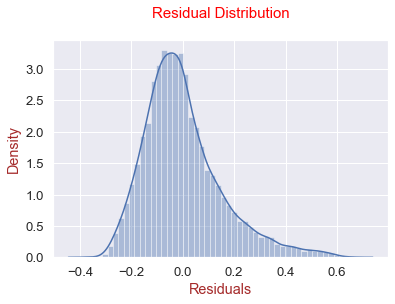

In [63]:
# checking residuals distribution

sns.distplot(res)
plt.xlabel('Residuals',fontdict={'color':'brown'})
plt.ylabel('Density',fontdict={'color':'brown'})
plt.title('Residual Distribution\n',fontdict={'fontsize':15, 'color':'red'})
plt.show()

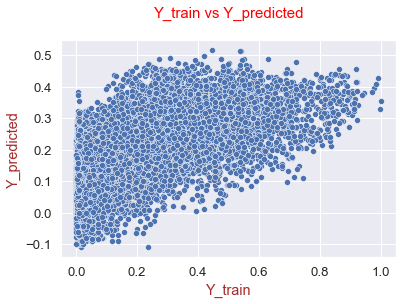

In [64]:
# scatter plot between the actual value and the predicted values.   

sns.scatterplot(Y_train,y_pred)

plt.xlabel('Y_train',fontdict={'color':'brown'})
plt.ylabel('Y_predicted',fontdict={'color':'brown'})
plt.title('Y_train vs Y_predicted\n',fontdict={'fontsize':15, 'color':'red'})
plt.show()


- Residuals are equally distributed across the regression line i.e. above and below the regression line and the variance of the residuals are same for all predicted scores along the regression line.

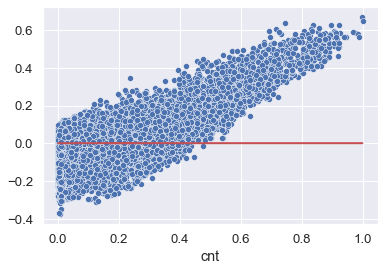

In [65]:
# Scatter plot of the residuals wrt the actual values.

plt.figure()
sns.scatterplot(Y_train,res)
plt.plot(Y_train,res*0,'r')
plt.show()

# Test Datset Prediction.

In [66]:
df_test.head()

,yr,hr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thur,tue,wed,heavy rain,light snow,mist
6052,0,18,0,1,0.72,0.62,0.1642,586,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
6250,0,0,0,1,0.62,0.94,0.0896,52,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
8110,0,14,0,1,0.38,0.46,0.2836,187,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7604,0,11,0,1,0.30,0.36,0.1343,140,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6356,0,10,0,1,0.64,0.94,0.1642,122,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [67]:
# Transforming the test data with the scale object creted on train set.

var1 = ['temp','hum','windspeed','cnt']
df_test[var1] = scaler.transform(df_test[var1])
df_test.describe()

,yr,hr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thur,tue,wed,heavy rain,light snow,mist
count,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.0,4345.000000,4345.000000
mean,0.501496,11.500806,0.029689,0.687457,0.490458,0.627728,0.225306,0.189156,0.253625,0.255236,0.239586,0.081703,0.089298,0.079402,0.092750,0.080092,0.081243,0.080552,0.087227,0.076410,0.082394,0.083774,0.133026,0.140852,0.142002,0.152819,0.141082,0.142232,0.0,0.084005,0.252244
std,0.500055,6.992403,0.169748,0.463583,0.199954,0.192578,0.146027,0.185627,0.435135,0.436044,0.426880,0.273943,0.285206,0.270396,0.290116,0.271467,0.273239,0.272178,0.282199,0.265683,0.274995,0.277081,0.339642,0.347908,0.349093,0.359855,0.348146,0.349329,0.0,0.277427,0.434351
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,5.000000,0.000000,0.000000,0.333333,0.480000,0.122840,0.037910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.000000,12.000000,0.000000,1.000000,0.500000,0.630000,0.228047,0.140369,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,1.000000,18.000000,0.000000,1.000000,0.645833,0.780000,0.298225,0.277664,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
max,1.000000,23.000000,1.000000,1.000000,1.020833,1.000000,0.947455,0.992828,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [68]:
# deviding the dataset into dependant and independant variables.

Y_test = df_test.pop('cnt')
X_test = df_test

In [69]:
# adding constant to the independant features.

X_test_lm = sm.add_constant(X_test)

In [70]:
# taking only those columns which required for making predictions.

X_test_lm = X_test_lm[X_train_man.columns]
X_test_lm.head()

,const,yr,temp,hum,winter,feb,july,june,mar,oct,heavy rain
6052,1.0,0,0.729167,0.62,0,0,0,0,0,0,0
6250,1.0,0,0.625000,0.94,1,0,0,0,0,0,0
8110,1.0,0,0.375000,0.46,1,0,0,0,0,0,0
7604,1.0,0,0.291667,0.36,1,0,0,0,0,0,0
6356,1.0,0,0.645833,0.94,1,0,0,0,0,0,0


In [71]:
# predicting the values for the test dataset from model created on train dataset.

y_test_pred = lm_final.predict(X_test_lm)

# Test dataset Residual analysis

In [72]:
# calculating the residual for test dataset.

test_res = y_test_pred - Y_test

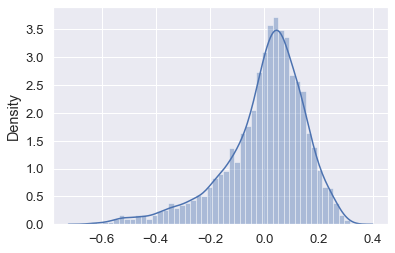

In [73]:
# checking the resudials distribution. 

sns.distplot(test_res)
plt.show()

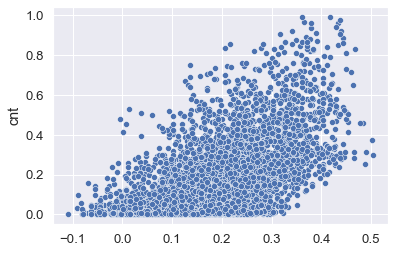

In [74]:
# scatter plot between the actual value and the predicted values.   

sns.scatterplot(y_test_pred,Y_test)
plt.show()

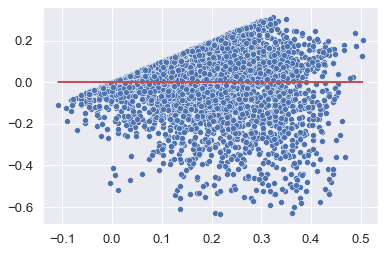

In [75]:
# Scatter plot of the residuals wrt the actual values.

plt.figure()
sns.scatterplot(y_test_pred,test_res)
plt.plot(y_test_pred,test_res*0,'r')
plt.show()

# R2 for Test data set

In [76]:
R2 = round(r2_score(Y_test,y_test_pred),3)
R2

0.337

# Insights from EDA
    . year - The users have increased over time from the year 2018 - 37.8% to the year 2019 - 62.2%.
    . season - The customers prefer to use the bikes during fall season and not much users in spring season.
    . Month.
        1. May,June,July, August and September months where users are more and constant.
        2. from October the users starts declining till January.
        3. from February the users starts increasing till April.
    . weekdays - all the weekdays show almost same number of users.
    . Workingdays - more people prefer to use the bikes sharing on working days than on holidays.
    . weathersit - more users when the weather is clear and very low users on light snow weather.
    . temp - There is some linear relationship exist between temp and "cnt", with positive correlation of 0.62.
    . spring - this dummy variable has highest negative correlation with "cnt" i.e -0.56


# Conclusion over model

The final equation for the prediction is.<br>
#### cnt = 0.3697 + 0.2261 x yr - 0.1055 x holiday + 0.5343 x temp - 0.2652 x hum - 0.1967 x windspeed - 0.1065 x spring + 0.0672 x winter + 0.0934 x july - 0.1968 x light snow

#### train R2 = 0.829.              <br>
#### train Adjusted R2 = 0.82.      <br>
#### test R2 = 0.806.               <br>
#### test Adjusted R2 = 0.77.      <br>

#### Positively effecting features.
    • The good temperature attracting more customers use the bikes.
    • The use of bike sharing expected to increase every year may be due to it's popularity or ease of use.
    • the season winter also attracting more customers.
    • the customers are likely to increase in july month.
#### Negatively effecting features.
    • The number of user likely to decrease on Holidays.
    • The more the Humid weather and windy weather resulting less customers are likely use the bikes may be due chances of rain or snow.
    • During spring season the decline in the bike usage.
    . Customers barely using the bikes in light snow weather.